## Problem statement:

People all throughout Los Angeles are concerned about recent reports of crimes in numerous locations. The mayor of Los Angeles has established a new Criminal Investigation Division to study how and why crime is on the rise, as well as the elements that contribute to it, so that officials may take the necessary steps to keep the city's residents safe.



## Objective:

As a member of the Analytics Division, you are aware that there are numerous questions that must be answered utilizing CID data. However, this data is not organized and is simply exported as flat files that can only be viewed if there are problems! You must create a pipeline to organize and manage this data using a SQL database to make it much easier to answer inquiries in the future. Then, using the data, react to the questions and write a detailed report for the authorities to utilize in taking action against crimes in Los Angeles.

### **Importing the necessary packages**

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns',None)

### Question 1

**Which was the most frequent crime comitted in each week?**

-- Hint: Rank the count of crime types in each week

In [ ]:
q1 = pd.read_csv("q1.csv")

In [ ]:
fig = px.bar(q1, x="week_number", y="crimes_reported", color="crime_type", title="Most frequent crime comitted in each week")
fig.update_layout(xaxis = dict(tickmode = 'array',tickvals = [1,2,3,4]),  autosize=False,
    width=700,
    height=500)
fig.show()

### Question 2

**Is crime more prevalent in areas with a higher population density, fewer police personnel, and a larger precinct area?**

In [ ]:
q2 = pd.read_csv("q2.csv")

In [ ]:
q2 = q2.set_index("precinct_code")

In [ ]:
q2 = q2.sort_values(by="total_areas")

Text(0.5, 1.0, 'Crimes recorded as per precinct')

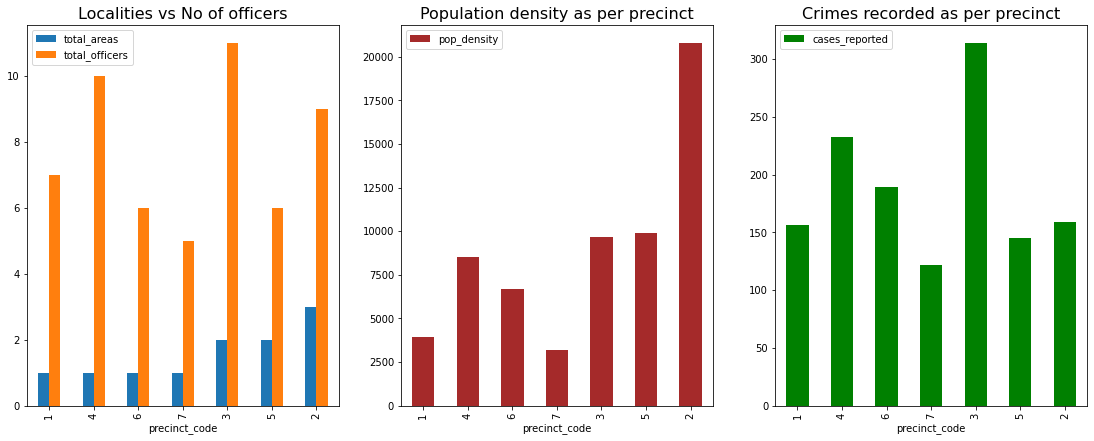

In [ ]:
fig,ax = plt.subplots(1,3)
q2[['total_areas','total_officers']].plot.bar(figsize=(19,7),ax=ax[0])
ax[0].set_title("Localities vs No of officers",fontsize=16)

q2[['pop_density']].plot.bar(ax=ax[1],color='brown')
ax[1].set_title("Population density as per precinct",fontsize=16)

q2[['cases_reported']].plot.bar(ax=ax[2],color="g")
ax[2].set_title("Crimes recorded as per precinct",fontsize=16)

### Question 3
**At what points of a day is crime rate at a peak? Group this by the type of crime**

-- Hint: /* time day parts [1] 00:00 to 05:00 = Midnight, [2] 05:01 to 12:00 = Morning, [3] 12:01 to 18:00 = Afternoon, [4] 18:01 to 21:00 = Evening, [5] 21:00 to 24:00 = Night */

In [ ]:
q3 = pd.read_csv("q3.csv")

In [ ]:
fig = px.bar(q3, x="dayparts", y="crimes_reported", color="crime_type", title="Crimes recorded in each day part")
fig.update_layout(autosize=False,
    width=700,
    height=500)
fig.show()

### Question 4
**At what point in the day, more crimes occurred in a different locality?**
    
-- Hint: /* time day parts [1] 00:00 to 05:00 = Midnight, [2] 05:01 to 12:00 = Morning, [3] 12:01 to 18:00 = Afternoon, [4] 18:01 to 21:00 = Evening, [5] 21:00 to 24:00 = Night */

In [ ]:
q4 = pd.read_csv('q4.csv')

In [ ]:
fig = px.bar(q4, x="area_name", y="cases_reported", color="dayparts", title="Highest crimes recorded in various areas in a point of a day")
fig.update_layout(autosize=False,
    width=700,
    height=500)
fig.show()

### Question 5

**Are a certain age group of people more likely to fall victim to crimes at certain points in a day?**


-- Hint: Age 0 to 12 kids , 13 to 23 teenage, 24 to 35 Middle age, 36 to 55 Adults, 56 to 120 old.

In [ ]:
q5 = pd.read_csv("q5.csv")

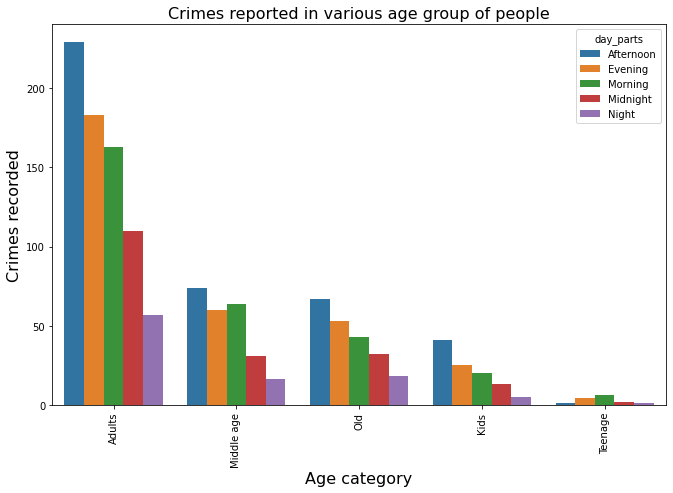

In [ ]:
plt.figure(figsize=(11,7))
sns.barplot(x="age_cat",y="cases_reported",hue="day_parts",data=q5)
plt.title("Crimes reported in various age group of people",fontsize=16)
plt.xlabel("Age category",fontsize=16)
plt.ylabel("Crimes recorded",fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Question 6

**Is there a higher number of reported offences that are still being investigated?**

In [ ]:
q6 = pd.read_csv("q6.csv")

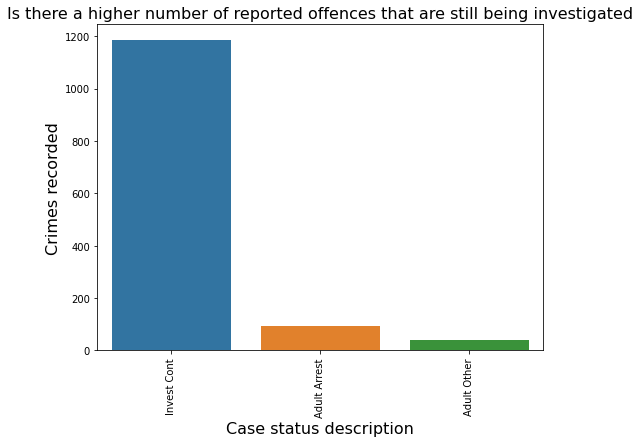

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="case_status_desc",y="case_count",data=q6)
plt.title("Is there a higher number of reported offences that are still being investigated",fontsize=16)
plt.xlabel("Case status description",fontsize=16)
plt.ylabel("Crimes recorded",fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Question 7 

**Do the existence of CCTV cameras deter crimes from happening? **

-- Hint: Check if there is a correlation between the number of cctvs each area and the crime rate

In [ ]:
q7 = pd.read_csv("q7.csv")
q7 = q7.sort_values(by="cctv_count",ascending=True)

In [ ]:
q7 = q7.set_index("area_name")

In [ ]:
q7

,cctv_count,cases_reported
area_name,,
77th Street,150,58
Rampart,165,233
Southwest,168,56
Hollenbeck,170,189
Harbor,180,71
West LA,244,156
Van Nuys,250,158
Northeast,255,45
West Valley,268,156


Text(0, 0.5, 'Crimes recorded')

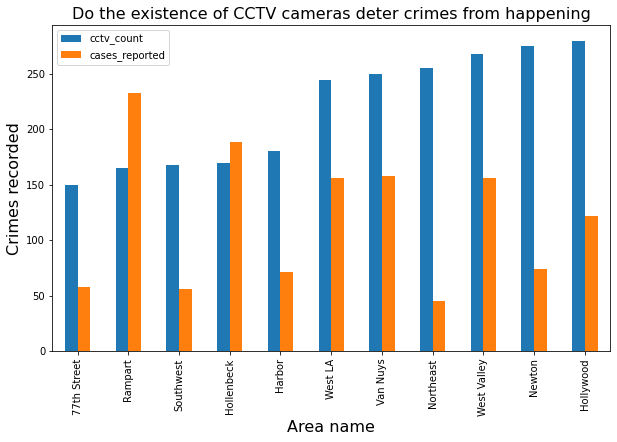

In [ ]:
q7.plot.bar(figsize=(10,6))
plt.title("Do the existence of CCTV cameras deter crimes from happening",fontsize=16)
plt.xlabel("Area name",fontsize=16)
plt.ylabel("Crimes recorded",fontsize=16)

### Question 8

**Is there CCTV footage from all of the crime scenes in the different areas available?**

In [ ]:
q8 = pd.read_csv("q8.csv")

In [ ]:
q8

,area_name,total_cctv,cctv_footage_available,cctv_footage_not_available
0,77th Street,150,17,41
1,Harbor,180,11,60
2,Hollenbeck,170,77,112
3,Hollywood,280,23,99
4,Newton,275,15,59
5,Northeast,255,16,29
6,Rampart,165,71,162
7,Southwest,168,19,37
8,Van Nuys,250,34,124
9,West LA,244,40,116


In [ ]:
q8 = q8.sort_values(by="total_cctv")

In [ ]:
q8 = q8.set_index("area_name")

Text(0, 0.5, 'Crimes recorded')

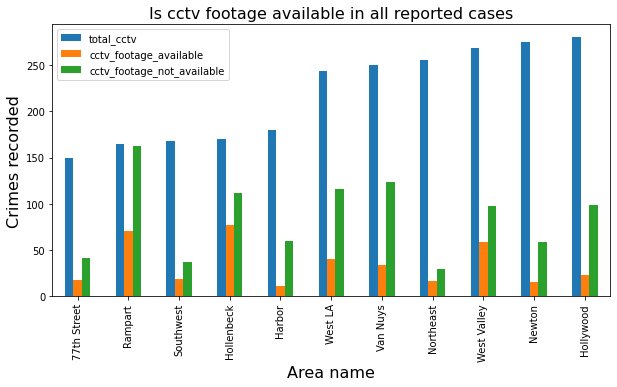

In [ ]:
q8.plot.bar(figsize=(10,5))  
plt.title("Is cctv footage available in all reported cases",fontsize=16)
plt.xlabel("Area name",fontsize=16)
plt.ylabel("Crimes recorded",fontsize=16)

### Question 9 

**What kind of crimes has the offender committed if he or she is related to the victim?**

In [ ]:
q9 = pd.read_csv("q9.csv")

In [ ]:
q9 = q9.set_index("crime_type")

Text(0, 0.5, 'Crimes recorded')

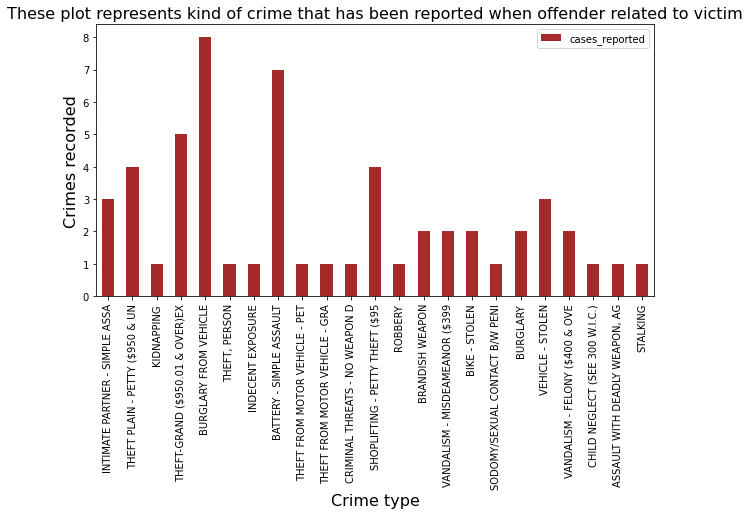

In [ ]:
q9.plot.bar(figsize=(10,5),color = 'brown')
plt.title("These plot represents kind of crime that has been reported when offender related to victim",fontsize=16)
plt.xlabel("Crime type",fontsize=16)
plt.ylabel("Crimes recorded",fontsize=16)

### Question 10 

**Is it necessary to concentrate more on the mode of complaint?**

In [ ]:
q10 = pd.read_csv("q10.csv")

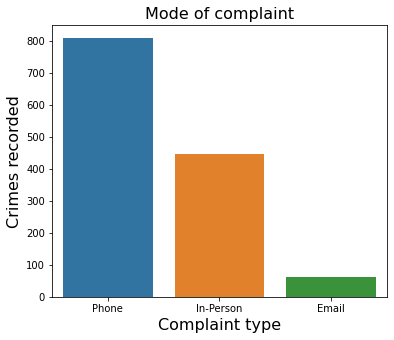

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="complaint_type",y="cases_reported",data=q10)
plt.title("Mode of complaint",fontsize=16)
plt.xlabel("Complaint type",fontsize=16)
plt.ylabel("Crimes recorded",fontsize=16)
plt.show()